# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [29]:
medical.shape

(1338, 8)

In [30]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

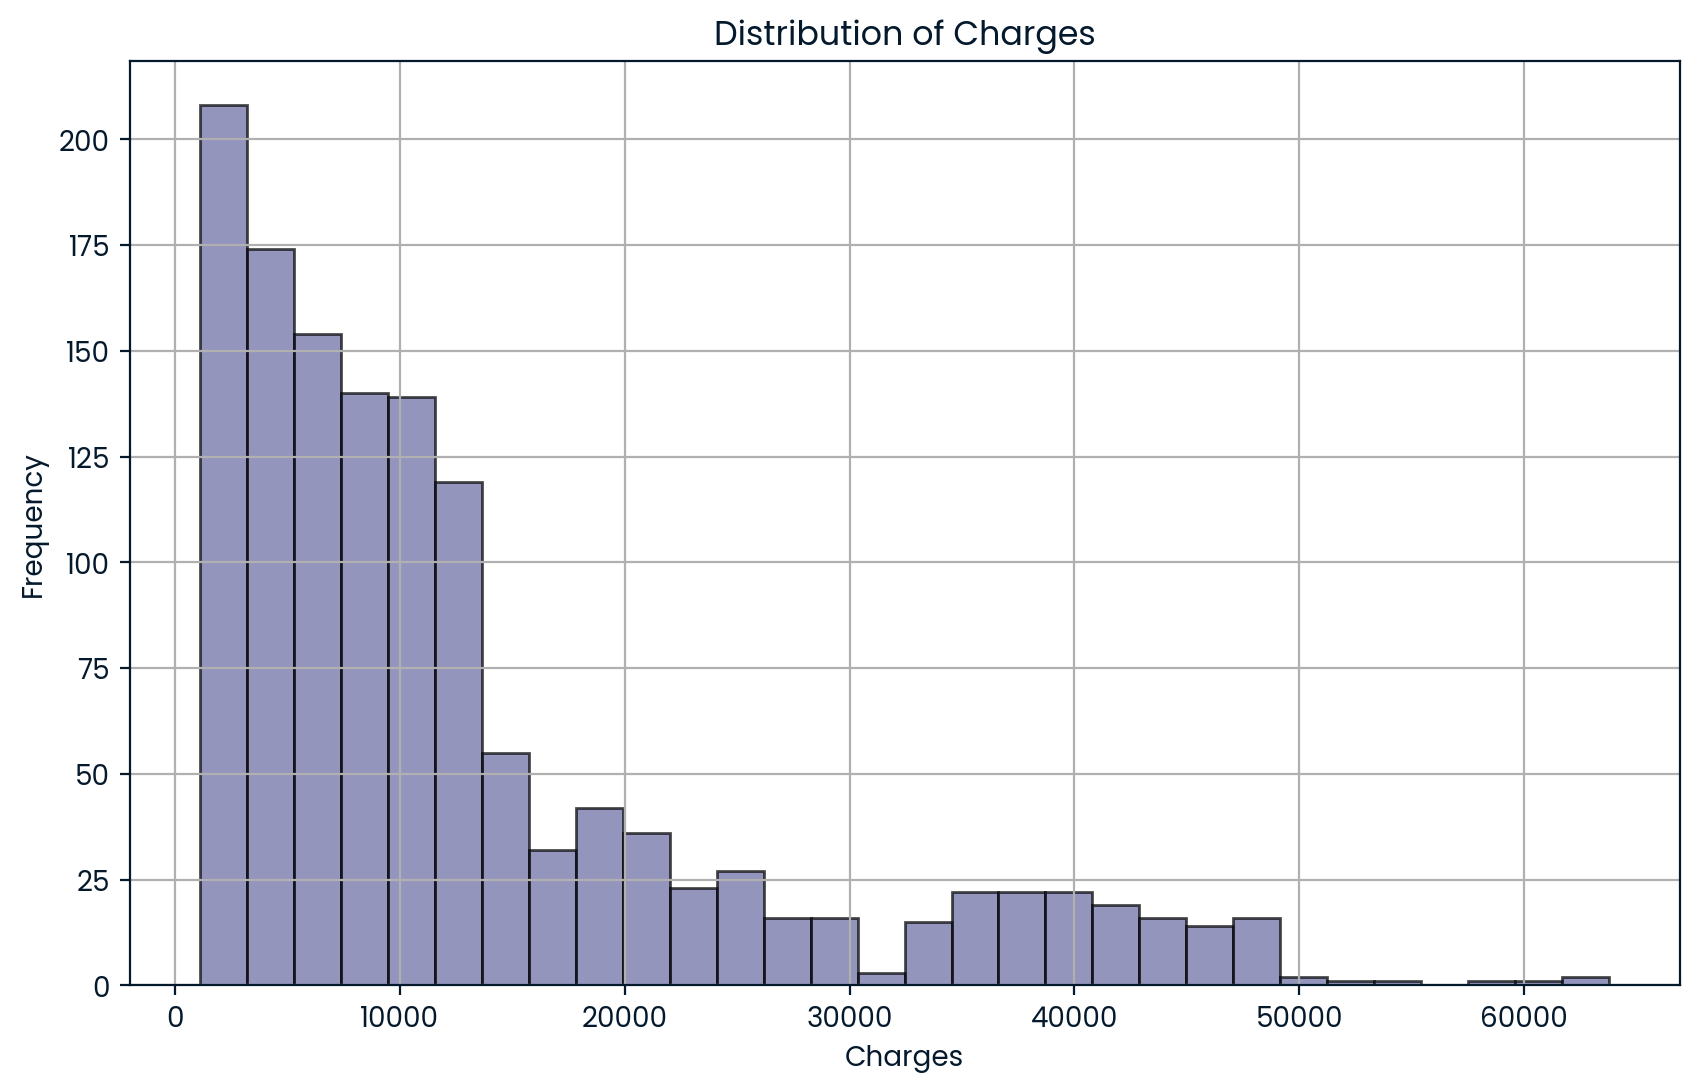

(13270.422265141257, 12110.011236694001)

In [31]:
# Plotting the histogram of charges
plt.figure(figsize=(10, 6))
plt.hist(medical['charges'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculating the mean and standard deviation
mean_charges = medical['charges'].mean()
std_charges = medical['charges'].std()

mean_charges, std_charges

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

To address the administrator's concern about the average charge falling below 12,000, we can perform a one-sample t-test. This test will help us determine if the mean charge in our sample is significantly different from the hypothesized population mean of 12,000.

### Justification:
1. **Random Sample**: We assume that the data provided is a random sample of all charges, which is crucial for the validity of the t-test.
2. **Normality**: The t-test assumes that the data is approximately normally distributed. Given a sufficiently large sample size, the Central Limit Theorem ensures that the sampling distribution of the mean will be approximately normal, even if the data itself is not perfectly normal.
3. **Independence**: Each charge in the sample should be independent of the others.

### Steps:
1. **Null Hypothesis (H0)**: The average charge is 12,000 (H0: μ = 12,000).
2. **Alternative Hypothesis (H1)**: The average charge is less than 12,000 (H1: μ < 12,000).

We will use a one-sample t-test to test these hypotheses.

### Code:
```python
from scipy import stats

# Define the hypothesized mean
hypothesized_mean = 12000

# Perform the one-sample t-test
t_stat, p_value = stats.ttest_1samp(medical['charges'], hypothesized_mean)

# Since we are performing a one-tailed test, we divide the p-value by 2
p_value /= 2

# Check if the t-statistic is negative (since we are testing if the mean is less than 12,000)
if t_stat < 0:
    result = "Reject the null hypothesis. There is evidence that the average charge is less than 12,000."
else:
    result = "Fail to reject the null hypothesis. There is no evidence that the average charge is less than 12,000."

t_stat, p_value, result
```

This code will provide the t-statistic, p-value, and the conclusion based on the test. If the p-value is less than the chosen significance level (commonly 0.05), we reject the null hypothesis and conclude that the average charge is indeed less than 12,000.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

In [ ]:


# Assuming the administrator is concerned about whether the mean charges are above a certain threshold
# This would imply a one-sided confidence interval

# Extract the charges data
charges = medical['charges']

# Calculate the sample mean and standard error
mean_charges = np.mean(charges)
std_error = stats.sem(charges)

# Calculate the critical value for a one-sided 95% confidence interval
alpha = 0.05
critical_value = stats.t.ppf(1 - alpha, df=len(charges) - 1)

# Calculate the margin of error
margin_of_error = critical_value * std_error

# Calculate the lower bound of the one-sided confidence interval
lower_bound = mean_charges - margin_of_error

# Comment on whether the administrator should be concerned
# This would depend on the threshold value which is not provided in the question
# Assuming a hypothetical threshold value for demonstration purposes
threshold = 10000  # Example threshold value

# Check if the lower bound of the confidence interval is above the threshold
concerned = lower_bound > threshold

mean_charges, std_error, critical_value, margin_of_error, lower_bound, concerned

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

**Null Hypothesis (H0):** There is no difference in the mean charges between people with insurance and those without insurance.
\[
H_0: \mu_{\text{with insurance}} = \mu_{\text{without insurance}}
\]

**Alternative Hypothesis (H1):** There is a difference in the mean charges between people with insurance and those without insurance.
\[
H_1: \mu_{\text{with insurance}} \neq \mu_{\text{without insurance}}
\]

**Assumption about the variances:** We are assuming that the variances of the two groups (people with insurance and people without insurance) are equal.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__

First, let's separate the charges into two groups: those with insurance and those without insurance.

```python
import numpy as np
import scipy.stats as stats

# Separate the charges into two groups
charges_with_insurance = medical[medical['insuranceclaim'] == 1]['charges']
charges_without_insurance = medical[medical['insuranceclaim'] == 0]['charges']
```

### Manual Calculation

1. Calculate the means and standard deviations of the two groups.
2. Calculate the pooled standard deviation.
3. Calculate the t-statistic.
4. Calculate the degrees of freedom.
5. Calculate the p-value.

```python
# Step 1: Calculate means and standard deviations
mean_with_insurance = np.mean(charges_with_insurance)
mean_without_insurance = np.mean(charges_without_insurance)
std_with_insurance = np.std(charges_with_insurance, ddof=1)
std_without_insurance = np.std(charges_without_insurance, ddof=1)

# Step 2: Calculate the pooled standard deviation
n_with_insurance = len(charges_with_insurance)
n_without_insurance = len(charges_without_insurance)
pooled_std = np.sqrt(((n_with_insurance - 1) * std_with_insurance**2 + (n_without_insurance - 1) * std_without_insurance**2) / (n_with_insurance + n_without_insurance - 2))

# Step 3: Calculate the t-statistic
t_statistic = (mean_with_insurance - mean_without_insurance) / (pooled_std * np.sqrt(1/n_with_insurance + 1/n_without_insurance))

# Step 4: Calculate the degrees of freedom
df = n_with_insurance + n_without_insurance - 2

# Step 5: Calculate the p-value
p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df))

t_statistic, p_value
```

### Using `scipy.stats`

```python
# Perform the t-test using scipy.stats
t_statistic_scipy, p_value_scipy = stats.ttest_ind(charges_with_insurance, charges_without_insurance, equal_var=True)

t_statistic_scipy, p_value_scipy
```

### Verification

Verify that the results from the manual calculation and `scipy.stats` are the same.

```python
np.isclose(t_statistic, t_statistic_scipy), np.isclose(p_value, p_value_scipy)
```

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__
Scipy does not have a built-in function specifically for performing a *z*-test from a sample in the same way it has for a _t_-test (e.g., `scipy.stats.ttest_1samp`). However, you can perform a *z*-test using the `statsmodels` library, which provides a `ztest` function in the `statsmodels.stats.weightstats` module. Alternatively, you can manually calculate the *z*-score using the formula:

\[ z = \frac{\bar{x} - \mu}{\sigma / \sqrt{n}} \]

where:
- \(\bar{x}\) is the sample mean,
- \(\mu\) is the population mean,
- \(\sigma\) is the population standard deviation,
- \(n\) is the sample size.

Here is an example of how you can perform a *z*-test using `statsmodels`:

```python
from statsmodels.stats.weightstats import ztest

# Example data
data = medical['charges']

# Perform z-test
z_stat, p_value = ztest(data, value=population_mean)

print(f"Z-statistic: {z_stat}, P-value: {p_value}")
```

In this example, `population_mean` should be replaced with the known population mean value you are testing against.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test